## Visualizing the embeddings in 2D

We will use t-SNE to reduce the dimensionality of the embeddings from 1536 to 2. Once the embeddings are reduced to two dimensions, we can plot them in a 2D scatter plot. The dataset is created in the [Obtain_dataset Notebook](Obtain_dataset.ipynb).

### 1. Reduce dimensionality

We reduce the dimensionality to 2 dimensions using t-SNE decomposition.

In [2]:
import pandas as pd
from sklearn.manifold import TSNE
import numpy as np

# Load the embeddings
# If you have not run the "Obtain_dataset.ipynb" notebook, you can download the datafile from here: https://cdn.openai.com/API/examples/data/fine_food_reviews_with_embeddings_1k.csv
datafile_path = "./data/fine_food_reviews_with_embeddings_1k.csv"
df = pd.read_csv(datafile_path)


In [4]:
# Convert to a list of lists of floats
matrix = np.array(df.embedding.apply(eval).to_list())

matrix

array([[ 7.10106920e-03, -2.73456480e-02,  1.05313053e-02, ...,
        -7.01857870e-03, -2.18875166e-02, -3.75607386e-02],
       [-3.13428370e-03, -9.95848142e-03, -3.49206338e-03, ...,
        -9.75403562e-03, -2.48467410e-03, -9.12750885e-03],
       [-1.75724812e-02, -8.26651158e-05, -1.15222773e-02, ...,
        -1.39020244e-02, -3.90170924e-02, -2.35151257e-02],
       ...,
       [-9.74910241e-03, -6.87123602e-03, -5.70622832e-03, ...,
        -3.00459806e-02, -8.14515445e-03, -1.95114054e-02],
       [-5.21062920e-03,  9.60669015e-04,  2.82862745e-02, ...,
        -5.38039953e-03, -1.33138765e-02, -2.71892995e-02],
       [-6.05782261e-03, -1.50158405e-02, -2.07575737e-03, ...,
        -2.90671214e-02, -1.41164539e-02, -2.28756946e-02]])

In [5]:
# Create a t-SNE model and transform the data
tsne = TSNE(n_components=2, perplexity=15, random_state=42, init='random', learning_rate=200)
vis_dims = tsne.fit_transform(matrix)

vis_dims

array([[ 11.286631  ,   7.7342854 ],
       [ -8.325872  , -45.2347    ],
       [ -8.023855  ,  60.676895  ],
       ...,
       [ 54.900997  ,  -0.18087745],
       [-41.315857  , -35.544987  ],
       [-23.644403  , -32.106647  ]], dtype=float32)

In [6]:

vis_dims.shape

(1000, 2)

### 2. Plotting the embeddings

We colour each review by its star rating, ranging from red to green.

We can observe a decent data separation even in the reduced 2 dimensions.

In [8]:
import matplotlib.pyplot as plt
import matplotlib
import numpy as np

colors = ["red", "darkorange", "gold", "turquoise", "darkgreen"]
x = [x for x,y in vis_dims]
y = [y for x,y in vis_dims]
color_indices = df.Score.values - 1

x


[11.286631,
 -8.325872,
 -8.023855,
 -20.620443,
 -8.662138,
 27.921782,
 13.525758,
 -4.647781,
 27.187403,
 13.686451,
 -18.645578,
 48.986134,
 -19.934229,
 -17.417984,
 -6.9923687,
 -10.993629,
 -13.147493,
 57.61794,
 57.95173,
 61.229347,
 -18.672966,
 62.456116,
 68.79657,
 56.39685,
 -38.02693,
 -8.836472,
 -6.3295603,
 -21.233608,
 -9.065448,
 -9.152673,
 19.921345,
 21.928337,
 -47.385674,
 26.17334,
 17.744642,
 15.857532,
 17.489658,
 21.711584,
 5.097108,
 -18.543337,
 24.8391,
 -1.1194777,
 52.220547,
 3.1000714,
 20.48004,
 -21.401608,
 -20.877123,
 -18.658934,
 1.9534838,
 -46.470604,
 -21.191097,
 22.00639,
 65.82223,
 19.447977,
 2.3783798,
 17.56227,
 -12.802175,
 -19.619099,
 3.8101406,
 0.50626296,
 61.894012,
 -15.009109,
 -12.272456,
 -14.948025,
 -0.6963963,
 -15.072726,
 5.7577085,
 -43.50285,
 -38.631115,
 -10.421289,
 -19.432478,
 9.838759,
 -49.257225,
 72.07274,
 -10.797157,
 67.0392,
 7.075367,
 -17.020054,
 -15.865205,
 -18.615252,
 24.931116,
 -18.085709

Text(0.5, 1.0, 'Amazon ratings visualized in language using t-SNE')

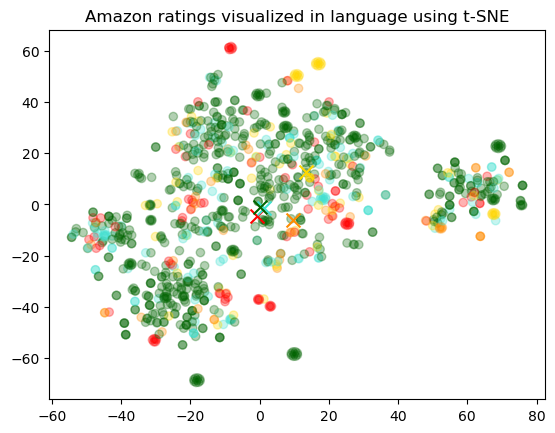

In [9]:
colormap = matplotlib.colors.ListedColormap(colors)
plt.scatter(x, y, c=color_indices, cmap=colormap, alpha=0.3)
for score in [0,1,2,3,4]:
    avg_x = np.array(x)[df.Score-1==score].mean()
    avg_y = np.array(y)[df.Score-1==score].mean()
    color = colors[score]
    plt.scatter(avg_x, avg_y, marker='x', color=color, s=100)

plt.title("Amazon ratings visualized in language using t-SNE")